In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn import metrics

### Load Data

In [3]:
### Load train_numeric
train_numeric = pd.read_csv('data/train_numeric.csv')
train_numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,13,0.003,0.019,0.294,0.312,0.031,0.161,0.022,0.088,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,18,-0.016,-0.041,-0.179,-0.179,-0.056,0.161,-0.007,-0.032,-0.082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [51]:
### Load f126
train_f126 =pd.read_csv('data/shared_data/numeric/train_numeric_f126_new.csv')
train_f126.head()
#train_f126.columns.values[0]='Id'
#train_f126 = train_f126.set_index('Id')
#train_f126.update(train_numeric[['Id']])
#train_f126.to_csv('data/shared_data/numeric/train_numeric_f126_new.csv', index=False)

,Id,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,Response
0,4.0,-0.312700,0.816510,0.81355,-1.14910,0.194130,-0.058558,0.67938,0.018254,0.24862,...,-0.58860,3.67960,2.57490,2.148600,0.65098,-0.40689,-1.91630,5.17900,-0.296970,0
1,6.0,0.081058,1.485200,0.30427,0.75172,-0.374380,-0.756980,0.88364,-0.087372,-0.73101,...,-0.53933,-1.37870,-0.31619,2.728500,2.43260,-0.33379,2.31390,-5.40730,0.563810,0
2,7.0,-0.633040,-1.389000,-0.92978,0.54054,-0.326960,-0.163980,-0.66100,-0.592320,0.26467,...,0.43921,-0.20105,0.35043,0.009986,0.99261,2.01900,-0.31278,-0.89923,0.087886,0
3,9.0,0.278110,1.828200,-0.17916,-0.46680,0.375250,-0.824130,-0.63162,0.232170,-0.82866,...,0.14684,-1.29600,-1.14380,-0.262660,0.22163,0.72172,0.56181,-1.29410,0.981290,0
4,11.0,-1.494200,-0.088658,1.16520,-0.51125,0.036272,0.411370,1.78440,0.113220,-0.29156,...,0.33493,-0.73553,-1.35560,-3.417300,-3.43920,0.14624,-0.57870,1.68050,0.539690,0


In [81]:
### Load f198
train_f198 =pd.read_csv('data/shared_data/numeric/train_numeric_f198.csv')
train_f198.head()
#train_f198.update(train_numeric[['Id']])
#train_f198.to_csv('data/shared_data/numeric/train_numeric_f198_new.csv')

,Id,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,Response
0,4.0,-0.142180,-0.513540,0.061745,0.010264,-0.638400,0.166450,0.010965,-0.063049,-0.10833,...,-0.58860,3.67960,2.57490,2.148600,0.65098,-0.40689,-1.91630,5.17900,-0.296970,0
1,6.0,0.050269,-0.430670,-0.922810,0.397150,-1.375700,1.027300,-0.036208,-0.410570,0.80951,...,-0.53933,-1.37870,-0.31619,2.728500,2.43260,-0.33379,2.31390,-5.40730,0.563810,0
2,7.0,0.092352,-0.369020,-0.104490,-0.439790,0.065912,-0.407330,0.386440,0.132520,-0.44176,...,0.43921,-0.20105,0.35043,0.009986,0.99261,2.01900,-0.31278,-0.89923,0.087886,0
3,9.0,-0.210600,-0.042812,0.413700,-0.501650,0.267310,0.023334,-0.040895,0.402580,-0.11965,...,0.14684,-1.29600,-1.14380,-0.262660,0.22163,0.72172,0.56181,-1.29410,0.981290,0
4,11.0,0.417300,1.204800,-0.244320,-0.434020,0.473120,-0.038659,0.391680,0.038538,0.21754,...,0.33493,-0.73553,-1.35560,-3.417300,-3.43920,0.14624,-0.57870,1.68050,0.539690,0


In [99]:
def get_lmfeat(train_numeric, feature_file):
    feat = pd.read_csv(feature_file)
    feat_names= feat['features'].values
    feat_names = np.insert(feat_names, 0, np.array(('Id')),0)
    feat_names = np.insert(feat_names, len(feat_names), np.array(('Response')),0)

    lm = train_numeric.loc[:, feat_names]
    lm.head()
    
    return lm

In [6]:
### lm : 104 features <0.1 missing rate 
lm = get_lmfeat (train_numeric, 'data/less_miss_features_01.csv')

In [100]:
lm05 = get_lmfeat (train_numeric, 'data/less_miss_features_05.csv')

### Merge other tables

In [15]:
id_feature=pd.read_csv('data/idfeature.csv')
id_feature.shape

(2367494, 9)

In [101]:
#id_feature = id_feature.drop(id_feature.columns[[1]], axis=1)
id_feature.head()

,Id,StartTime,0_¯\_(ツ)_/¯_1,0_¯\_(ツ)_/¯_2,0_¯\_(ツ)_/¯_3,0_¯\_(ツ)_/¯_4
0,1800056,-1.0,2,-1,9999999,-1
1,1800057,-1.0,1,-2,1,-2
2,1800059,-1.0,2,-6,2,-6
3,1800065,-1.0,6,-1,6,-1
4,1800066,-1.0,1,-5,1,-5


In [104]:
lm_id = pd.merge(lm, id_feature, on='Id', how='left')

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,...,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response,StartTime,0_¯\_(ツ)_/¯_1,0_¯\_(ツ)_/¯_2,0_¯\_(ツ)_/¯_3,0_¯\_(ツ)_/¯_4
0,4,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,...,0.0,0.0,0.0,0.000,0,82.24,9999999,-2,-2314450,-224451
1,6,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,...,0.0,0.0,0.0,0.000,0,1313.12,2,-1,-943242,-67530
2,7,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,...,0.0,0.0,0.0,0.000,0,1618.70,1,-2,-2313512,-26876
3,9,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,...,0.0,0.0,0.0,0.000,0,1149.20,2,-2,-2196581,-3564
4,11,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,...,0.0,0.0,0.0,0.000,0,602.64,2,-2,-2226678,-1
5,13,-0.084,0.185,-0.017,0.150,0.116,0.139,-0.050,-0.040,-0.168,...,0.0,0.0,0.0,0.000,0,1331.66,2,-1,-2307035,-9079
6,14,-0.084,-0.139,0.121,0.285,-0.052,-0.061,0.063,0.070,-0.116,...,0.0,0.0,0.0,0.000,0,1662.63,1,-2,-2363398,-6285
7,16,-0.014,-0.190,-0.037,0.131,-0.021,-0.012,-0.012,-0.020,0.053,...,0.0,0.0,0.0,0.000,0,791.22,2,-2,-1933391,-101101
8,18,0.182,-0.030,0.053,0.210,-0.088,-0.095,-0.038,-0.027,0.273,...,0.0,0.0,0.0,0.000,0,517.64,2,-5,-2356186,-121525
9,23,-0.103,0.170,-0.097,0.061,-0.057,-0.036,0.145,0.200,-0.016,...,0.0,0.0,0.0,0.000,0,156.27,5,-3,-2363501,-3558


In [107]:
lm05_id = pd.merge(lm198, id_feature, on='Id', how='left')

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,...,L3_S30_F3704,L3_S30_F3709,L3_S30_F3714,L3_S30_F3719,Response,StartTime,0_¯\_(ツ)_/¯_1,0_¯\_(ツ)_/¯_2,0_¯\_(ツ)_/¯_3,0_¯\_(ツ)_/¯_4
0,4,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,...,NaN,NaN,NaN,NaN,0,82.24,9999999,-2,-2314450,-224451
1,6,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,...,0.201,0.008,0.0,0.0,0,1313.12,2,-1,-943242,-67530
2,7,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,...,0.054,0.007,0.0,0.0,0,1618.70,1,-2,-2313512,-26876
3,9,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,...,-0.045,0.022,0.0,0.0,0,1149.20,2,-2,-2196581,-3564
4,11,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,...,-0.186,0.026,0.0,0.0,0,602.64,2,-2,-2226678,-1
5,13,-0.084,0.185,-0.017,0.150,0.116,0.139,-0.050,-0.040,-0.168,...,0.057,-0.004,0.0,0.0,0,1331.66,2,-1,-2307035,-9079
6,14,-0.084,-0.139,0.121,0.285,-0.052,-0.061,0.063,0.070,-0.116,...,-0.007,0.004,0.0,0.0,0,1662.63,1,-2,-2363398,-6285
7,16,-0.014,-0.190,-0.037,0.131,-0.021,-0.012,-0.012,-0.020,0.053,...,0.161,-0.007,0.0,0.0,0,791.22,2,-2,-1933391,-101101
8,18,0.182,-0.030,0.053,0.210,-0.088,-0.095,-0.038,-0.027,0.273,...,NaN,NaN,NaN,NaN,0,517.64,2,-5,-2356186,-121525
9,23,-0.103,0.170,-0.097,0.061,-0.057,-0.036,0.145,0.200,-0.016,...,NaN,NaN,NaN,NaN,0,156.27,5,-3,-2363501,-3558


In [115]:
train_f126_id = pd.merge(train_f126, id_feature, on='Id', how='left')

,Id,1,2,3,4,5,6,7,8,9,...,123,124,125,126,Response,StartTime,0_¯\_(ツ)_/¯_1,0_¯\_(ツ)_/¯_2,0_¯\_(ツ)_/¯_3,0_¯\_(ツ)_/¯_4
0,4.0,-0.312700,0.816510,0.813550,-1.149100,0.194130,-0.058558,0.679380,0.018254,0.248620,...,-0.406890,-1.916300,5.17900,-0.296970,0,82.24,9999999,-2,-2314450,-224451
1,6.0,0.081058,1.485200,0.304270,0.751720,-0.374380,-0.756980,0.883640,-0.087372,-0.731010,...,-0.333790,2.313900,-5.40730,0.563810,0,1313.12,2,-1,-943242,-67530
2,7.0,-0.633040,-1.389000,-0.929780,0.540540,-0.326960,-0.163980,-0.661000,-0.592320,0.264670,...,2.019000,-0.312780,-0.89923,0.087886,0,1618.70,1,-2,-2313512,-26876
3,9.0,0.278110,1.828200,-0.179160,-0.466800,0.375250,-0.824130,-0.631620,0.232170,-0.828660,...,0.721720,0.561810,-1.29410,0.981290,0,1149.20,2,-2,-2196581,-3564
4,11.0,-1.494200,-0.088658,1.165200,-0.511250,0.036272,0.411370,1.784400,0.113220,-0.291560,...,0.146240,-0.578700,1.68050,0.539690,0,602.64,2,-2,-2226678,-1
5,13.0,0.091167,-1.163900,0.290370,-0.433360,0.011944,0.115300,0.316030,0.140830,0.178020,...,0.989910,2.257300,-6.37190,0.077395,0,1331.66,2,-1,-2307035,-9079
6,14.0,1.022300,0.304900,0.232890,1.071500,-0.968930,-1.973700,0.933420,-1.194400,-2.790700,...,-0.185530,0.591600,-1.57450,0.095765,0,1662.63,1,-2,-2363398,-6285
7,16.0,1.016400,-1.405300,-1.445700,0.980660,2.665700,-0.681210,1.388000,1.694900,3.475900,...,1.107900,0.003364,0.86731,-0.816340,0,791.22,2,-2,-1933391,-101101
8,18.0,1.457700,-0.392290,0.243530,-0.407410,-0.147900,0.072349,-0.800970,0.340590,-0.125990,...,0.006528,-1.486700,4.08310,-0.151340,0,517.64,2,-5,-2356186,-121525
9,23.0,-0.559570,0.834660,-0.133500,0.055611,-0.142030,-0.529180,-0.125970,-0.039250,-0.570040,...,-0.040840,-2.648400,6.24700,-0.478810,0,156.27,5,-3,-2363501,-3558


In [116]:
train_f198_id = pd.merge(train_f198, id_feature, on='Id', how='left')

,Id,1,2,3,4,5,6,7,8,9,...,195,196,197,198,Response,StartTime,0_¯\_(ツ)_/¯_1,0_¯\_(ツ)_/¯_2,0_¯\_(ツ)_/¯_3,0_¯\_(ツ)_/¯_4
0,4.0,-0.142180,-0.513540,0.061745,0.010264,-0.638400,0.166450,0.010965,-0.063049,-0.108330,...,-0.406890,-1.916300,5.17900,-0.296970,0,82.24,9999999,-2,-2314450,-224451
1,6.0,0.050269,-0.430670,-0.922810,0.397150,-1.375700,1.027300,-0.036208,-0.410570,0.809510,...,-0.333790,2.313900,-5.40730,0.563810,0,1313.12,2,-1,-943242,-67530
2,7.0,0.092352,-0.369020,-0.104490,-0.439790,0.065912,-0.407330,0.386440,0.132520,-0.441760,...,2.019000,-0.312780,-0.89923,0.087886,0,1618.70,1,-2,-2313512,-26876
3,9.0,-0.210600,-0.042812,0.413700,-0.501650,0.267310,0.023334,-0.040895,0.402580,-0.119650,...,0.721720,0.561810,-1.29410,0.981290,0,1149.20,2,-2,-2196581,-3564
4,11.0,0.417300,1.204800,-0.244320,-0.434020,0.473120,-0.038659,0.391680,0.038538,0.217540,...,0.146240,-0.578700,1.68050,0.539690,0,602.64,2,-2,-2226678,-1
5,13.0,0.323870,-0.349040,-0.025411,0.372360,-0.541590,-0.045466,0.124940,-0.225720,-0.239370,...,0.989910,2.257300,-6.37190,0.077395,0,1331.66,2,-1,-2307035,-9079
6,14.0,-0.178990,-0.460720,-0.666390,0.159250,-1.116300,-0.738900,0.388780,0.667460,-1.391100,...,-0.185530,0.591600,-1.57450,0.095765,0,1662.63,1,-2,-2363398,-6285
7,16.0,-0.554440,-0.745490,0.318890,-2.330800,-1.103300,1.943000,-0.813500,-0.323570,-0.104550,...,1.107900,0.003364,0.86731,-0.816340,0,791.22,2,-2,-1933391,-101101
8,18.0,0.002563,-0.997650,0.356920,0.398080,-0.108720,0.098623,-0.259220,-0.112900,-0.046949,...,0.006528,-1.486700,4.08310,-0.151340,0,517.64,2,-5,-2356186,-121525
9,23.0,0.606220,0.542110,-0.907550,0.051406,-0.343270,0.075599,-0.018038,-0.066707,0.069045,...,-0.040840,-2.648400,6.24700,-0.478810,0,156.27,5,-3,-2363501,-3558


In [10]:
# load data_id
train_pos_id = pd.read_csv('data/NewDataSet/train_pos_id.csv')
train_neg_id = pd.read_csv('data/NewDataSet/train_neg_id.csv')
val_pos_id = pd.read_csv('data/NewDataSet/val_pos_id.csv')
val_neg_id = pd.read_csv('data/NewDataSet/val_neg_id.csv')
test_pos_id = pd.read_csv('data/NewDataSet/test_pos_id.csv')
test_neg_id = pd.read_csv('data/NewDataSet/test_neg_id.csv')
train_id = pd.read_csv('data/NewDataSet/train_id.csv')
val_id = pd.read_csv('data/NewDataSet/val_id.csv')
test_id = pd.read_csv('data/NewDataSet/test_id.csv')

In [8]:
lm_pos = lm.loc[lm['Response'] == 1] 
lm_neg = lm.loc[lm['Response'] == 0]
lm_pos = lm_pos.apply(np.random.permutation)
lm_neg = lm_neg.apply(np.random.permutation)
np.size(lm_pos,0), np.size(lm_neg,0)

(6879, 1176868)

In [9]:
# num of pos/neg for train/val/test
pos_num = np.size(lm_pos,0)
neg_num = np.size(lm_neg,0)
train_pos_num = int(pos_num*0.5+1)
train_neg_num = int(neg_num*0.5)
val_pos_num = int(pos_num*0.25+1)
val_neg_num = int(neg_num*0.25)
test_pos_num= int(pos_num*0.25)
test_neg_num = int(neg_num*0.25)
train_pos_num + val_pos_num + test_pos_num, train_neg_num + val_neg_num + test_neg_num

(6879, 1176868)

In [12]:
# train_pos = pos_data.iloc[0:train_pos_num]
# np.size(train_pos,0)
lm_train_pos = lm_pos.loc[lm_pos['Id'].isin(train_id['Id'])]
lm_train_neg = lm_neg.loc[lm_neg['Id'].isin(train_id['Id'])]
np.size(lm_train_pos, 0), np.size(lm_train_neg, 0)

(3389, 588485)

In [13]:
# train_neg_num = int(neg_num*0.5)
# train_neg = neg_data.iloc[0:train_neg_num]
# np.size(train_neg, 0)
lm_val_pos = lm_pos.loc[lm_pos['Id'].isin(val_id['Id'])]
lm_val_neg = lm_neg.loc[lm_neg['Id'].isin(val_id['Id'])]
np.size(lm_pos, 0), np.size(lm_neg,0)

(6879, 1176868)

In [14]:
lm_test_pos = lm_pos.loc[lm_pos['Id'].isin(test_id['Id'])]
lm_test_neg = lm_neg.loc[lm_neg['Id'].isin(test_id['Id'])]
np.size(lm_test_pos, 0), np.size(lm_test_neg,0)

(1716, 294220)

In [92]:
def get_roc(train):
    f_pos = train.loc[train['Response'] == 1] 
    f_neg = train.loc[train['Response'] == 0]
    f_pos = f_pos.apply(np.random.permutation)
    f_neg = f_neg.apply(np.random.permutation)
    np.size(f_pos,0), np.size(f_neg,0)

    f_train_pos = f_pos.loc[f_pos['Id'].isin(train_id['Id'])]
    f_train_neg = f_neg.loc[f_neg['Id'].isin(train_id['Id'])]
    np.size(f_train_pos, 0), np.size(f_train_neg, 0)
    
    f_val_pos = f_pos.loc[f_pos['Id'].isin(val_id['Id'])]
    f_val_neg = f_neg.loc[f_neg['Id'].isin(val_id['Id'])]
    np.size(f_pos, 0), np.size(f_neg,0)
    
    f_test_pos = f_pos.loc[f_pos['Id'].isin(test_id['Id'])]
    f_test_neg = f_neg.loc[f_neg['Id'].isin(test_id['Id'])]
    np.size(f_test_pos, 0), np.size(f_test_neg,0)
    
    f_test = f_test_pos.append(f_test_neg)
    f_test.shape
    
    f_listp=[x for x in f_pos.columns if x not in ["Id","Response"]]
    
    f_Xtest = f_test[f_listp]
    f_y_true = f_test['Response']#.values
    
    ratio =  [50]
    res_columns = ['method','pn_ratio', 'auc']#, 'mcc']
    res = pd.DataFrame(columns = res_columns)
    
    
    param = {'max_depth':8, 'eta':.1, 'silent':1}
    param['colsample_bytree'] = 0.8
    param['subsample'] = 0.8
    param['min_child_weight'] = 3
    param['base_score'] = 0.005
    param['objective'] = "binary:logistic"
    #param['n_estimators']=200
    #param['learning_rate'] = 0.05
    #param['eval_metric'] = "auc"
    num_round=20     ## how many trees 
    
    f_dtest = xgb.DMatrix(f_Xtest,silent=True)
    train_neg_num = train_pos_num * ratio[0]
    
    f_train = f_train_pos.append(f_train_neg.iloc[0:train_neg_num])
    f_Xtrain=f_train[f_listp]
    f_Ytrain=f_train['Response']

    f_dvisibletrain = xgb.DMatrix(f_Xtrain,f_Ytrain,silent=True)
    f_clf=xgb.train(param, f_dvisibletrain, num_round, maximize=True)

    f_prediction = f_clf.predict(f_dtest)
    fpr, tpr, thresholds = roc_curve(f_y_true, f_prediction, pos_label=1) 
    
    return fpr, tpr

In [93]:
fpr0, tpr0 = get_roc(lm)

In [93]:
fpr1, tpr1 = get_roc(f_train)

In [93]:
fpr2, tpr2 = get_roc(train_f198)

In [102]:
fpr3, tpr3 = get_roc(lm05)

In [105]:
fpr4, tpr4 = get_roc(lm_id)

In [117]:
fpr5, tpr5 = get_roc(lm05_id)

In [119]:
fpr6, tpr6 = get_roc(train_f126_id)

In [120]:
fpr7, tpr7 = get_roc(train_f198_id)

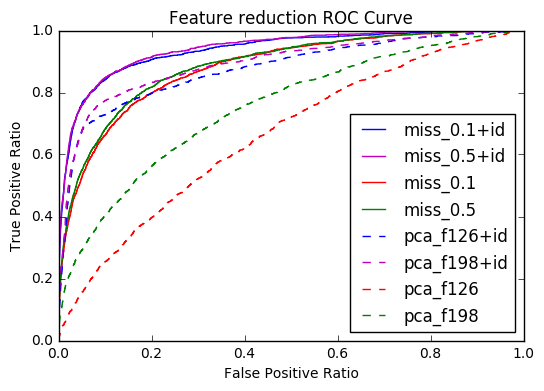

In [126]:
plt.plot(fpr4,tpr4,'b-', label='miss_0.1+id')
plt.plot(fpr5,tpr5,'m-', label='miss_0.5+id')
plt.plot(fpr0,tpr0,'r-', label='miss_0.1')
plt.plot(fpr3,tpr3,'g-', label='miss_0.5')
plt.plot(fpr6,tpr6,'b--', label='pca_f126+id')
plt.plot(fpr7,tpr7,'m--', label='pca_f198+id')
plt.plot(fpr1,tpr1,'r--', label='pca_f126')
plt.plot(fpr2,tpr2,'g--', label='pca_f198')

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('Feature reduction ROC Curve')
plt.legend(loc=4)


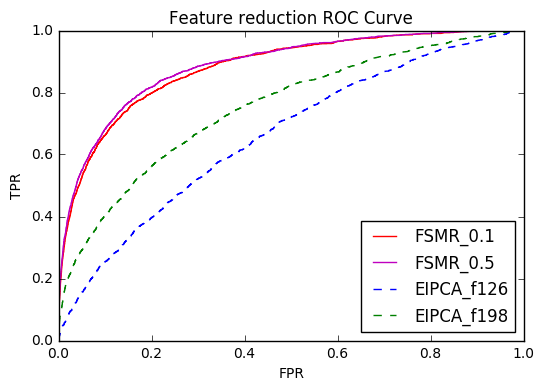

In [132]:

plt.plot(fpr0,tpr0,'r-', label='FSMR_0.1')
plt.plot(fpr3,tpr3,'m-', label='FSMR_0.5')
plt.plot(fpr1,tpr1,'b--', label='EIPCA_f126')
plt.plot(fpr2,tpr2,'g--', label='EIPCA_f198')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Feature reduction ROC Curve')
plt.legend(loc=4)


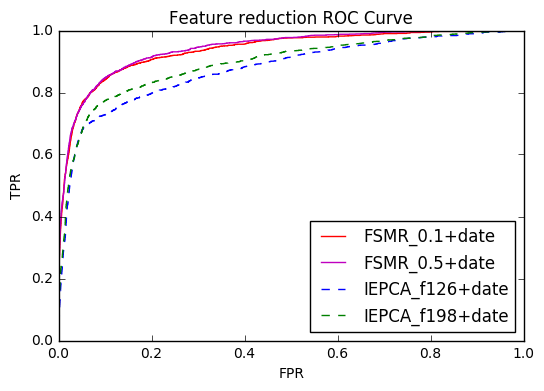

In [133]:
plt.plot(fpr4,tpr4,'r-', label='FSMR_0.1+date')
plt.plot(fpr5,tpr5,'m-', label='FSMR_0.5+date')

plt.plot(fpr6,tpr6,'b--', label='IEPCA_f126+date')
plt.plot(fpr7,tpr7,'g--', label='IEPCA_f198+date')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Feature reduction ROC Curve')
plt.legend(loc=4)


### Down Sampling

In [66]:
lm_test = lm_test_pos.append(lm_test_neg)
lm_test.shape

(295936, 106)

In [67]:
f_test = f_test_pos.append(f_test_neg)
f_test.shape

(295936, 128)

In [70]:
lm_listp=[x for x in lm_pos.columns if x not in ["Id","Response"]]

In [71]:
f_listp=[x for x in f_pos.columns if x not in ["Id","Response"]]

In [73]:
lm_Xtest = lm_test[lm_listp]
lm_y_true = lm_test['Response']#.values

In [74]:
f_Xtest = f_test[f_listp]
f_y_true = f_test['Response']#.values

## Training xgb

In [75]:
#ratio = [1, 3, 10, 20, 30, 40, 50, 100]#, 150]
ratio =  [50]

In [76]:
res_columns = ['method','pn_ratio', 'auc']#, 'mcc']
res = pd.DataFrame(columns = res_columns)

In [77]:
param = {'max_depth':8, 'eta':.1, 'silent':1}
param['colsample_bytree'] = 0.8
param['subsample'] = 0.8
param['min_child_weight'] = 3
param['base_score'] = 0.005
param['objective'] = "binary:logistic"
#param['n_estimators']=200
#param['learning_rate'] = 0.05
#param['eval_metric'] = "auc"

## how many trees 
num_round=20

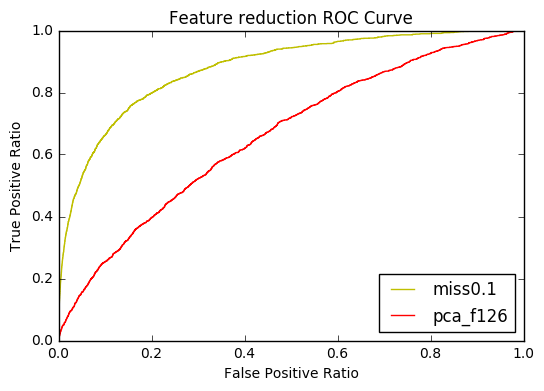

In [80]:
from sklearn.metrics import roc_curve, auc
% matplotlib inline
import matplotlib.pyplot as plt

lm_dtest = xgb.DMatrix(lm_Xtest,silent=True)
f_dtest = xgb.DMatrix(f_Xtest,silent=True)

train_neg_num = train_pos_num * ratio[0]

## 
lm_train = lm_train_pos.append(lm_train_neg.iloc[0:train_neg_num])

lm_Xtrain=lm_train[lm_listp]
lm_Ytrain=lm_train['Response']
 
lm_dvisibletrain = xgb.DMatrix(lm_Xtrain, lm_Ytrain,silent=True)
lm_clf=xgb.train(param, lm_dvisibletrain, num_round, maximize=True)

lm_prediction = lm_clf.predict(lm_dtest)
fpr0, tpr0, thresholds0 = roc_curve(lm_y_true, lm_prediction, pos_label=1)    

##
f_train = f_train_pos.append(f_train_neg.iloc[0:train_neg_num])

f_Xtrain=f_train[f_listp]
f_Ytrain=f_train['Response']
 
f_dvisibletrain = xgb.DMatrix(f_Xtrain,f_Ytrain,silent=True)
f_clf=xgb.train(param, f_dvisibletrain, num_round, maximize=True)

f_prediction = f_clf.predict(f_dtest)
fpr1, tpr1, thresholds1 = roc_curve(f_y_true, f_prediction, pos_label=1)  
##
# train_neg_num = train_pos_num * ratio[2]
# train = train_pos.append(train_neg.iloc[0:train_neg_num])

# Xtrain=train[listp]
# Ytrain=train['Response']
 
# dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
# clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

# prediction = clf.predict(dtest)
# fpr2, tpr2, thresholds2 = roc_curve(y_true, prediction, pos_label=1)    
# ##
# train_neg_num = train_pos_num * ratio[3]
# train = train_pos.append(train_neg.iloc[0:train_neg_num])

# Xtrain=train[listp]
# Ytrain=train['Response']
 
# dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
# clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

# prediction = clf.predict(dtest)
# fpr3, tpr3, thresholds3 = roc_curve(y_true, prediction, pos_label=1)    
# #
# train = train_pos.append(train_neg)

# Xtrain=train[listp]
# Ytrain=train['Response']
 
# dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
# clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

# prediction = clf.predict(dtest)
# fpr4, tpr4, thresholds4 = roc_curve(y_true, prediction, pos_label=1)    
    
plt.plot(fpr0,tpr0,'y-', label='miss0.1')
plt.plot(fpr1,tpr1,'r-', label='pca_f126')
# plt.plot(fpr2,tpr2,'m-', label='1:20')
# plt.plot(fpr3,tpr3,'g-', label='1:50')
# plt.plot(fpr4,tpr4,'b--', label='1:171')
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('Feature reduction ROC Curve')
plt.legend(loc=4)


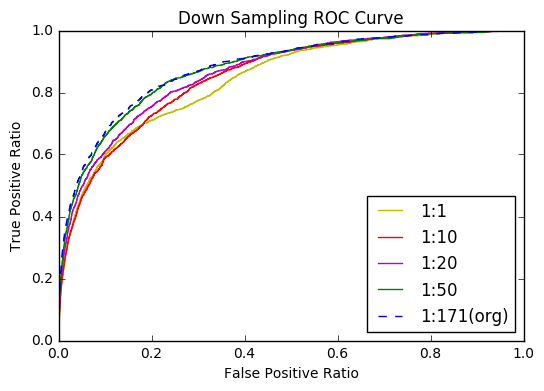

In [163]:
plt.plot(fpr0,tpr0,'y-', label='1:1')
plt.plot(fpr1,tpr1,'r-', label='1:10')
plt.plot(fpr2,tpr2,'m-', label='1:20')
plt.plot(fpr3,tpr3,'g-', label='1:50')
plt.plot(fpr4,tpr4,'b--', label='1:171(org)')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Down Sampling ROC Curve')
plt.legend(loc=4)
plt.savefig('data/images/down_roc.png', dpi=1000)

SyntaxError: invalid syntax (<ipython-input-161-ab4c7541845a>, line 1)

In [137]:
auc0

0.84304077320952442

In [140]:
res1

,pn_ratio,fpr0,fpr1,tpr0,tpr1,auc
0,1.0,0.0,0.000003,0.000000,0.000000,0.843041
1,10.0,0.0,0.000003,0.000000,0.000000,0.852810
2,20.0,0.0,0.000000,0.000583,0.001748,0.863594
3,50.0,0.0,0.000007,0.000583,0.000583,0.876541
4,171.0,0.0,0.000000,0.000583,0.001748,0.881093


In [147]:
fpr0.shape

(10088,)

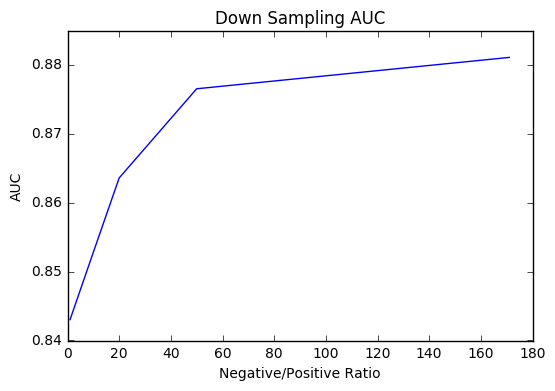

In [142]:
res1_columns = ['pn_ratio', 'fpr0','fpr1', 'tpr0','tpr1', 'auc']#, 'mcc']
res1 = pd.DataFrame(columns = res1_columns)

auc0 = metrics.auc(fpr0, tpr0)
res1.loc[len(res1)]= [1, fpr0[0], fpr0[1], tpr0[0], tpr0[1], auc0]

auc1 = metrics.auc(fpr1, tpr1)
res1.loc[len(res1)]= [10, fpr1[0], fpr1[1], tpr1[0], tpr1[1], auc1]

auc2 = metrics.auc(fpr2, tpr2)
res1.loc[len(res1)]= [20, fpr2[0], fpr2[1], tpr2[0], tpr2[1], auc2]

auc3 = metrics.auc(fpr3, tpr3)
res1.loc[len(res1)]= [50, fpr3[0], fpr3[1], tpr3[0], tpr3[1], auc3]

auc4 = metrics.auc(fpr4, tpr4)
res1.loc[len(res1)]= [171, fpr4[0], fpr4[1], tpr4[0], tpr4[1], auc4]
  
plt.plot(res1['pn_ratio'], res1['auc'])
plt.xlabel('Negative/Positive Ratio')
plt.ylabel('AUC')
plt.title('Down Sampling AUC')
plt.show()

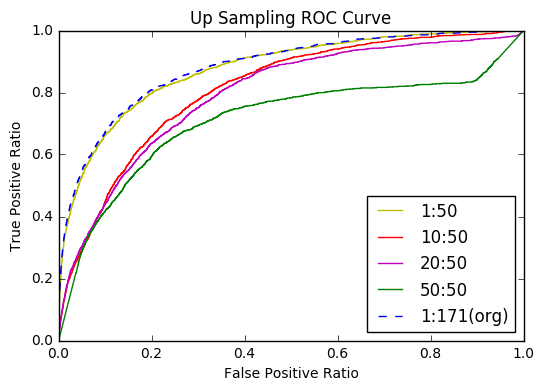

In [151]:
## Down & UP sampling

from sklearn.metrics import roc_curve, auc
% matplotlib inline
import matplotlib.pyplot as plt

ratio =  [1, 5, 10, 20, 30, 50, 171]
train_neg_num = train_pos_num * 50
train_50 = train_neg.iloc[0:train_neg_num]
dtest = xgb.DMatrix(Xtest,silent=True)

# *1
train = train_50.append(train_pos)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
ufpr0, utpr0, uthresholds0 = roc_curve(y_true, prediction, pos_label=1)    

# *10
train = train_50.append(train_pos)
for i in range(9):
    train = train.append(train_pos)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
ufpr1, utpr1, uthresholds1 = roc_curve(y_true, prediction, pos_label=1)    

# *20
for i in range(10):
    train = train.append(train_pos)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
ufpr2, utpr2, uthresholds2 = roc_curve(y_true, prediction, pos_label=1)

# * 50
for i in range(30):
    train = train.append(train_pos)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
ufpr3, utpr3, uthresholds3 = roc_curve(y_true, prediction, pos_label=1)

##
# train = train_pos.append(train_neg.iloc[0:train_neg_num])

# Xtrain=train[listp]
# Ytrain=train['Response']
 
# dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
# clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

# prediction = clf.predict(dtest)
# fpr1, tpr1, thresholds1 = roc_curve(y_true, prediction, pos_label=1)  
    
plt.plot(ufpr0,utpr0,'y-', label='1:50')
plt.plot(ufpr1,utpr1,'r-', label='10:50')
plt.plot(ufpr2,utpr2,'m-', label='20:50')
plt.plot(ufpr3,utpr3,'g-', label='50:50')
plt.plot(fpr4,tpr4,'b--', label='1:171(org)')
#plt.plot(fpr1,tpr1,'r-', label=10)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('Up Sampling ROC Curve')
plt.legend(loc=4)


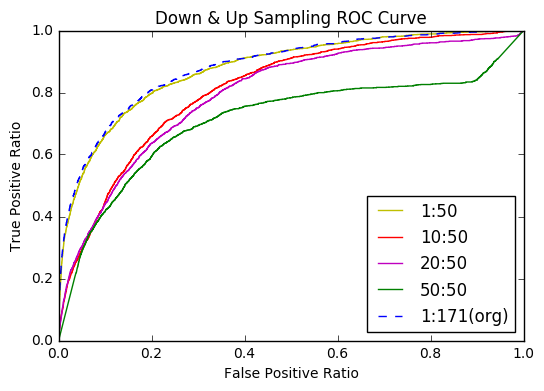

In [164]:
plt.plot(ufpr0,utpr0,'y-', label='1:50')
plt.plot(ufpr1,utpr1,'r-', label='10:50')
plt.plot(ufpr2,utpr2,'m-', label='20:50')
plt.plot(ufpr3,utpr3,'g-', label='50:50')
plt.plot(fpr4,tpr4,'b--', label='1:171(org)')
#plt.plot(fpr1,tpr1,'r-', label=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Down & Up Sampling ROC Curve')
plt.legend(loc=4)
plt.savefig('data/images/down_up_roc.png', dpi=1000)

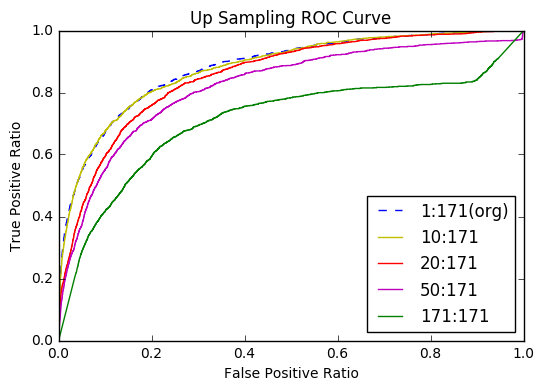

In [154]:
## UP sampling

from sklearn.metrics import roc_curve, auc
% matplotlib inline
import matplotlib.pyplot as plt

ratio =  [1, 5, 10, 20, 30, 50, 171]
#train_neg_num = train_pos_num * 50
dtest = xgb.DMatrix(Xtest,silent=True)

# *1
train = train_neg.append(train_pos)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
uufpr0, uutpr0, uuthresholds0 = roc_curve(y_true, prediction, pos_label=1)    

# *10
train10 = train_pos
for i in range(9):
    train10 = train10.append(train_pos)
train = train_neg.append(train10)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
uufpr1, uutpr1, uuthresholds1 = roc_curve(y_true, prediction, pos_label=1)    

# *20
train = train.append(train10)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
uufpr2, uutpr2, uuthresholds2 = roc_curve(y_true, prediction, pos_label=1)

# * 50
for i in range(3):
    train = train.append(train10)

Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
uufpr3, uutpr3, uuthresholds3 = roc_curve(y_true, prediction, pos_label=1)

# * 171
for i in range(12):
    train = train.append(train_pos)
train = train.append(train_pos)
Xtrain=train[listp]
Ytrain=train['Response']
 
dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

prediction = clf.predict(dtest)
uufpr4, uutpr4, uuthresholds4 = roc_curve(y_true, prediction, pos_label=1)


##
# train = train_pos.append(train_neg.iloc[0:train_neg_num])

# Xtrain=train[listp]
# Ytrain=train['Response']
 
# dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
# clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

# prediction = clf.predict(dtest)
# fpr1, tpr1, thresholds1 = roc_curve(y_true, prediction, pos_label=1)  
    
plt.plot(fpr4,tpr4,'b--', label='1:171(org)')
plt.plot(uufpr0,uutpr0,'y-', label='10:171')
plt.plot(uufpr1,uutpr1,'r-', label='20:171')
plt.plot(uufpr2,uutpr2,'m-', label='50:171')
plt.plot(uufpr3,uutpr3,'g-', label='171:171')
#plt.plot(fpr1,tpr1,'r-', label=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Up Sampling ROC Curve')
plt.legend(loc=4)


In [117]:
def fprtest, tprtest = do_xgboost(res, train, val):
    Xtrain=train[listp]
    Ytrain=train['Response']
    Xval = val[listp]
    Yval = val['Response']
    
    dvisibletrain = xgb.DMatrix(Xtrain,Ytrain,silent=True)
    # dvisibleval = xgb.DMatrix(Xval,Yval, silent=True)
    #watchlist = [(dvisibletrain, 'train'), (dvisibleval, 'val')]
    
    clf=xgb.train(param, dvisibletrain, num_round, maximize=True)
#     clf=xgb.train(param, dvisibletrain, num_round, evals=watchlist, early_stopping_rounds=50,maximize=True)
#                   #feval = mcc_eval)

    # Validation
    #dtest = xgb.DMatrix(test[listp],silent=True)
    # dtest = xgb.DMatrix(Xval,silent=True)
    # Yval_pred = clf.predict(dtest)    
    
    #prediction = clf.predict(dtest)
    #y_pred = (prediction > .08).astype(int)
     
    from sklearn.metrics import roc_curve, auc
    
    # fprval, tprval, thresholds = roc_curve(Yval, Yval_pred, pos_label=1)
    # valorigin = {'tprval' : tprval,
    #           'fprval' : fprval}
    # valorigind=pd.DataFrame(valorigin)
    # valorigind.to_csv('valdown0.5.csv',index=False)

    # dtest = xgb.DMatrix(X_val,silent=True)
    # prediction = clf.predict(dtest)

    dtest = xgb.DMatrix(Xtest,silent=True)
    prediction = clf.predict(dtest)
    # y_pred = (prediction > .08).astype(int)
    fprtest, tprtest, thresholds = roc_curve(y_true, prediction, pos_label=1)
    
    #fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    #testorigin = {'tprval' : tprtest,'fprval' : fprtest}
    #testorigind=pd.DataFrame(testorigin)
    #testorigind.to_csv('testdown0.5.csv', index=False)

    auc = metrics.auc(fprtest, tprtest)
    res.loc[len(res)]= [i, np.size(train,0), np.size(val,0), np.size(test,0), fpr[0], fpr[1], tpr[0], tpr[1], auc]
    
    return fprtest, tprtest


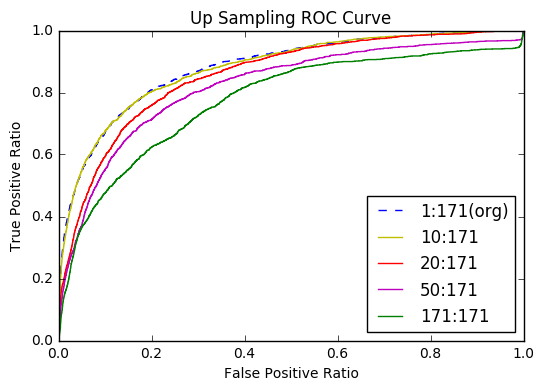

In [165]:
plt.plot(fpr4,tpr4,'b--', label='1:171(org)')
plt.plot(uufpr0,uutpr0,'y-', label='10:171')
plt.plot(uufpr1,uutpr1,'r-', label='20:171')
plt.plot(uufpr2,uutpr2,'m-', label='50:171')
plt.plot(uufpr3,uutpr3,'g-', label='171:171')
#plt.plot(fpr1,tpr1,'r-', label=10)
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('Up Sampling ROC Curve')
plt.legend(loc=4)
plt.savefig('data/images/up_roc.png', dpi=1000)

In [133]:
res

,pn_ratio,train_num,val_num,test_num,fpr0,fpr1,tpr0,tpr1,auc
0,1.0,6829.0,3494.0,295936.0,0.0,0.836564,0.0,0.995338,0.579387
1,3.0,13709.0,6934.0,295936.0,0.0,0.408093,0.0,0.919580,0.755744
2,5.0,20589.0,10374.0,295936.0,0.0,0.294416,0.0,0.878205,0.791895
3,7.0,27469.0,13814.0,295936.0,0.0,0.228703,0.0,0.842075,0.806686
4,8.0,30909.0,15534.0,295936.0,0.0,0.198263,0.0,0.818765,0.810251
5,9.0,34349.0,17254.0,295936.0,0.0,0.175515,0.0,0.799534,0.812009
6,10.0,37789.0,18974.0,295936.0,0.0,0.159483,0.0,0.789044,0.814781
7,11.0,41229.0,20694.0,295936.0,0.0,0.141673,0.0,0.765152,0.811739
8,12.0,44669.0,22414.0,295936.0,0.0,0.131235,0.0,0.757576,0.813170
9,15.0,54989.0,27574.0,295936.0,0.0,0.099001,0.0,0.700466,0.800733


In [80]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

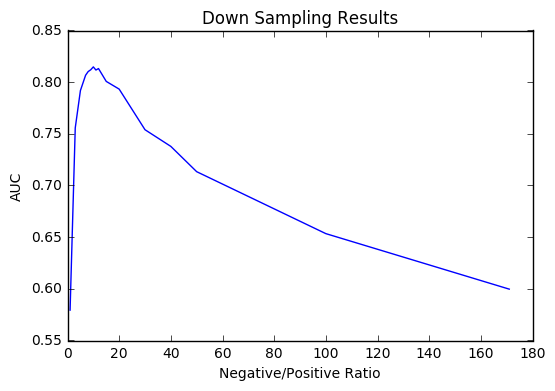

In [92]:
plt.plot(res['pn_ratio'], res['auc'])
plt.xlabel('Negative/Positive Ratio')
plt.ylabel('AUC')
plt.title('Down Sampling Results')
plt.show()

In [90]:
res = pd.read_csv('results_missing_less01_1126.csv')
res

,pn_ratio,train_num,val_num,test_num,fpr0,fpr1,tpr0,tpr1,auc
0,1,6829,3494,295936,0,0.836564,0,0.995338,0.579387
1,3,13709,6934,295936,0,0.408093,0,0.919580,0.755744
2,5,20589,10374,295936,0,0.294416,0,0.878205,0.791895
3,7,27469,13814,295936,0,0.228703,0,0.842075,0.806686
4,8,30909,15534,295936,0,0.198263,0,0.818765,0.810251
5,9,34349,17254,295936,0,0.175515,0,0.799534,0.812009
6,10,37789,18974,295936,0,0.159483,0,0.789044,0.814781
7,11,41229,20694,295936,0,0.141673,0,0.765152,0.811739
8,12,44669,22414,295936,0,0.131235,0,0.757576,0.813170
9,15,54989,27574,295936,0,0.099001,0,0.700466,0.800733


In [89]:
res.to_csv('results_missing_less01_1126.csv', index=False)

In [75]:


Y_train = train['Response_x']
X_train = train[listp]

dvisibletrain = xgb.DMatrix(X_train,Y_train,silent=True)
param = {'max_depth':8, 'eta':.05, 'silent':1}
param['colsample_bytree'] = 0.8
param['subsample'] = 0.8
param['min_child_weight'] = 3
param['base_score'] = 0.005
param['objective'] = "binary:logistic"

## how many trees 
num_round=20

clf=xgb.train(param, dvisibletrain, num_round, maximize=True)

NameError: name 'prec' is not defined